# Single Layer Perceptron for Character Recognition

## By: Jeremy Rico and Daniel Walsh

This program creates 26 individual perceptrons, one for each letter of the alphabet. The perceptrons are trained on the training set from dataset.py and tested on the test set from the same file. in the training and the test set, each letter is represented as a 5x7 dot matrix.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import dataset
#path = "/Users/DanielWalsh/Desktop/dataset.py"
#open(path).readline()

Since the dataset represents each character as a dot matrix, we must first convert each matrix in the dataset into a binary vector. Then we combine the vectors to create the final training set as a binary matrix

In [61]:
# convert dot matrix to binary vector
def char2vec(char):
    return [
        0 if pixel == '.' else 1
        for line in char
        for pixel in line
    ]

char2vec() converts each 5x7 dot matrix into a binary vector

'#' = 1

'.' = 0

In [62]:
# convert entire dataset to np array with leading 1 for w0
# also appends 0 to each row later to be used for storing expected output
def mat2np_arr_TRAIN(data):
    set = []
    for elem in data:
        row = char2vec(elem) # convert 5x7 dot matrix to linear vector
        row.insert(0,1) # preppend each row with a 1 for w0
        row.append(0) # append with a 0 for expected ouput
        set.append(row)

    return np.array(set) #convert to np array and return

mat2np_arr_TRAIN does a few important things:

1. it calls char2vec() to create a binary vector 
 
    (#, ., #) => (1, 0, 1)
 
 
2. it prepends that vector with a 1 to account for w0
    
    (1, 0, 1) => (1, 1, 0, 1)
 
 
3. it appends the vector with a 0 which will hold the value for expected output
    
    (1, 1, 0, 1) => (1, 1, 0, 1, 0)
 
 
4. it converts the final matrix into an np matrix

**This function is ONLY to be used for the training set, as the test set is not to have a column for expected output**

In [63]:
# convert entire dataset to np array with leading 1 for w0
# DOES NOT append a 0 for expected input
def mat2np_arr_TEST(data):
    set = []
    for elem in data:
        row = char2vec(elem) # convert 5x7 dot matrix to linear vector
        row.insert(0,1) # preppend each row with a 1 for w0
        set.append(row)

    return np.array(set) #convert to np array and return

mat2np_arr_TEST() does everything that mat2np_arr_TRAIN does except append each row with a 0 for the expected output. Otherwise, it is exactly the same

## Perceptron Class Definitions:

### Initialization:


Each perceptron is initized with the following:
1. The training set which is copied using np.copy()
2. A set of random weights between -1 and 1
3. A name (Ex: Perceptron 'A', Perceptron 'B')
4. Threshold value to be used for activation (Default set to 0.0)

In [64]:
class Perceptron:
    # initializer
    # matrix of inputs must have leading ones and expected output values
    def __init__(self, input_mat, name, thresh = 0.0):
        self.input_mat = np.copy(input_mat)
        # initialize random weights
        np.random.seed(1)
        self.weights = 2 * np.random.random_sample(len(self.input_mat[0]) - 1) - 1
        self.name = name
        self.thres = thresh # default threshold set to 0 for activation function

### Activation function:

Simply takes the dot product of the input vector (without the expected output value) and the weights.

Returns 1 if the dot value if greater than the threshold value (0.0). This means the neuron has activated or "fired"

Otherwise returns 0

In [65]:
    # activation function
    def activation_func(self, inputs, weights):
        total_activation = np.dot(inputs, weights)
        return 1.0 if total_activation >= self.thres else 0.0

### Predictions function:

This function loops through each element in the training set. For each element (or letter) it calls the activation function to make a prediction based on the current weights. Each predictions is appended to a list called predictions. The function then returns this list.

For example, for the 'A' perceptron a correct prediction list would have a 1.0 in index 0 and a 0.0 in all other indexes. So the return value would look like this:

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [66]:
    # prediction for each character stored in a list
    def predict(self, matrix, weights):
        predictions = []
        for i in range(len(matrix)):
            prediction = self.activation_func(matrix[i][:-1], weights)
            predictions.append(prediction)

        return predictions

### Accuracy function:

The accuracy function calculates the accuracy of our predictions by comparing them to the expected output. It returns the percentage of correct predictions the perceptrons has made.

In [67]:
    # accuracy function to calculate the percentage of correct predictions made
    def accuracy(self, expected, predictions):
        num_correct = 0.0
        for i in range(len(predictions)):
            if predictions[i] == expected[i]: num_correct += 1.0

        return num_correct/float(len(expected))

### Training function:

This is the big boy. It is used to adjust the weights of each perceptron according to the Perceptron LEarning Algorithm.

First we define and set default values for the following parameters:
1. max_epoch: maximum number of EPOCHS; default set to 1000
2. l_rate: learning rate ETA; default value set to 0.1 (found to be the best value via trial and error)
3. stop_early: stop function if we have reached 100% accuracy
4. do_print: prints out important values such as errors made and current accuracy

We also define a new class attribute, errors_made. This will store the number of errors made by the perceptron during each EPOCH. It will be later used to create error plots.

For each EPOCH we will:
1. initialize the number of errors as 0
2. make predictions with the current weights
3. calculate the current accuracy of those predictions

If we have reached 100% accuracy:
1. append errors_made with a 0 for plotting purposes
2. print out final calcualtions
3. break from the loop

Otherwise for each element (letter) in the training set we will:
1. calculate the error using the following equation

    **error = expected output - prediction**
    
    and increment the number of errors if error != 0
    
2. For each weight in the weight array we will update its value using the following eqation
    
    **new Weight = old Weight + (learning rate * error * input value at that index)**

Finally, we append the number of errors made at that epoch to errors_made and print information if do_print is set to true.

In [68]:
 class Perceptron:
    # initializer
    # matrix of inputs must have leading ones and expected output values
    def __init__(self, input_mat, name, thresh = 0.0):
        self.input_mat = np.copy(input_mat)
        # initialize random weights
        np.random.seed(1)
        self.weights = 2 * np.random.random_sample(len(self.input_mat[0]) - 1) - 1
        self.name = name
        self.thres = thresh # default threshold set to 0 for activation function
        
            # activation function
    def activation_func(self, inputs, weights):
        total_activation = np.dot(inputs, weights)
        return 1.0 if total_activation >= self.thres else 0.0
    
        # prediction for each character stored in a list
    def predict(self, matrix, weights):
        predictions = []
        for i in range(len(matrix)):
            prediction = self.activation_func(matrix[i][:-1], weights)
            predictions.append(prediction)

        return predictions
    
        # accuracy function to calculate the percentage of correct predictions made
    def accuracy(self, expected, predictions):
        num_correct = 0.0
        for i in range(len(predictions)):
            if predictions[i] == expected[i]: num_correct += 1.0

        return num_correct/float(len(expected))
    
    
    # function used to train the perceptron
    def train(self, max_epoch = 1000, l_rate = 0.1, stop_early = True, do_print = False):

        if do_print: print('\nTRAINING PERCEPTRON: %s' % self.name)
            
        self.errors_made = []    
        for epoch in range(max_epoch):

            num_errors = 0
            self.preds = self.predict(self.input_mat, self.weights)
            cur_acc = self.accuracy(self.input_mat[:, -1], self.preds)
    
            # if we have reached 100% accuracy we can stop early
            if cur_acc == 1.0 and stop_early:
                self.errors_made.append(num_errors)
                if do_print:
                    print("\nEpoch %d \nErrors made: %d" % (epoch + 1, num_errors))
                    print("Accuracy: %0.5f" %cur_acc)
                    print("Weights: ", self.weights)
                    print("Predictions: ", self.preds)
                break

            for i in range(len(self.input_mat)):
                # calculate error (+1 or -1 mean wrong prediction; 0 means correct)
                error = self.input_mat[i][-1] - self.preds[i]
                # if prediction was wrong increment number of errors
                if error != 0: num_errors += 1

                # update weights using eta(?) equation
                for j in range(len(self.weights)):
                    self.weights[j] = self.weights[j] + (l_rate * error * self.input_mat[i][j])

            self.errors_made.append(num_errors)
            if do_print:
                print("\nEpoch %d \nErrors made: %d" % (epoch + 1, num_errors))
                print("Accuracy: %0.5f" % cur_acc)
                print("Weights: ", self.weights)
                print("Predictions: ", self.preds)
                    # test function works with only one letter at a time
                    
    def test(self, test_matrix):
        return self.activation_func(test_matrix, self.weights)
    
        # plot error function
    def plot_error(self):
        epochs = np.arange(0, len(self.errors_made))
        plt.figure()
        plt.plot(epochs, self.errors_made, 'b-')
        plt.title("Training Error for " + self.name)
        plt.xlabel("EPOCH")
        plt.ylabel("# of Errors Made")
        plt.show()

### Test function:

Only to be used to test the finalizes weights.
Simply calls the activation function and returns either 0 or 1

In [69]:
    # test function works with only one letter at a time
    def test(self, test_matrix):
        return self.activation_func(test_matrix, self.weights)

### Plot Error function:

Uses matplotlib to plot the errors_made list 

In [70]:
    # plot error function
    def plot_error(self):
        epochs = np.arange(0, len(self.errors_made))
        plt.figure()
        plt.plot(epochs, self.errors_made, 'b-')
        plt.title("Training Error for " + self.name)
        plt.xlabel("EPOCH")
        plt.ylabel("# of Errors Made")
        plt.show()

## BEGIN MAIN CODE

Create Training set and Test set using conversion functions

dict: sed solely for ease of use when testing different perceptrons

dict_: is used in the training loop to name each perceptron after it's letter

perceptrons: a list to be used to store each perceptron

In [71]:
# mat2np_arr prepends a 1 and appends a 0 to each column of the training data
TRAINING_SET = mat2np_arr_TRAIN(dataset.TRAINING_DATA)
TEST_SET = mat2np_arr_TEST(dataset.TEST_DATA)
dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8,
 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17,
 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
dict_ = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
perceptrons = []

### Training loop

Copies training set and changes the appropriate expected output slot to 1.0.

Then trains a perceptron based on the data and appends it to our list

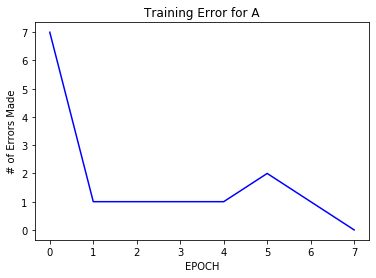

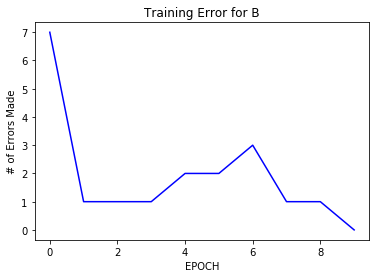

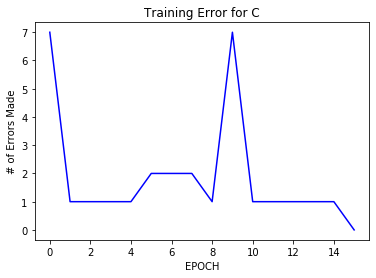

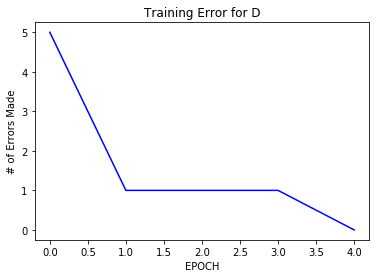

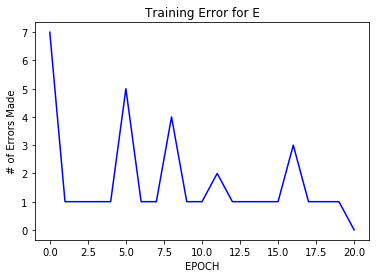

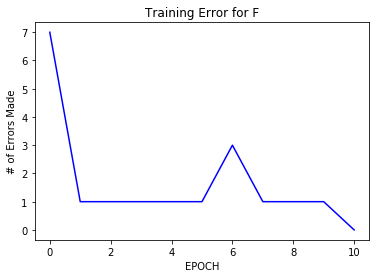

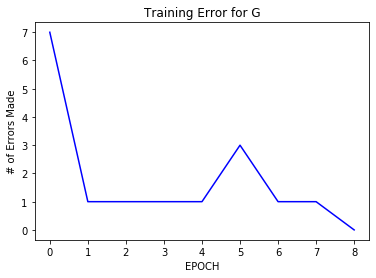

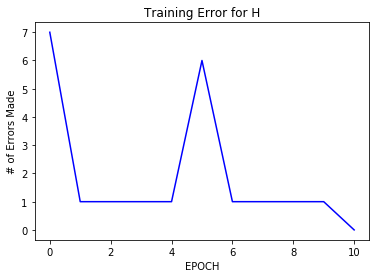

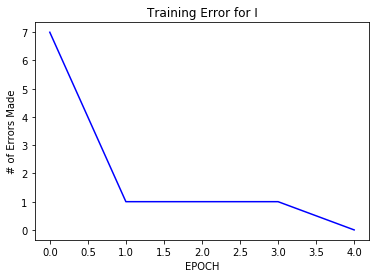

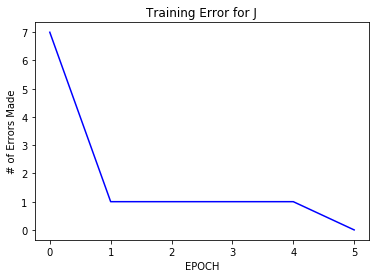

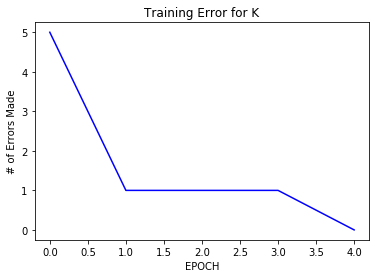

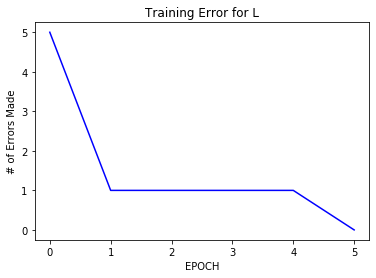

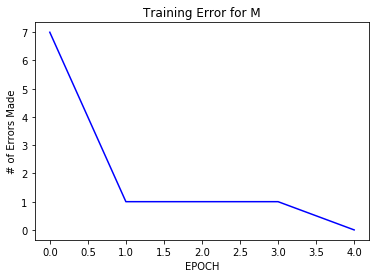

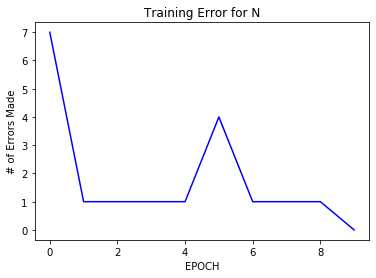

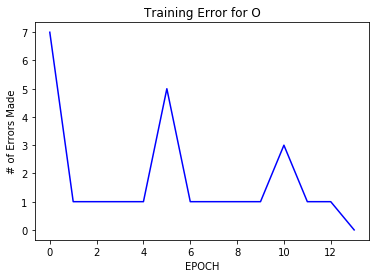

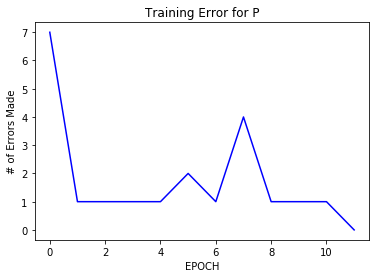

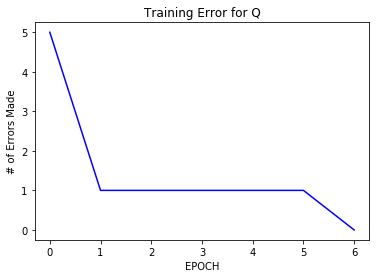

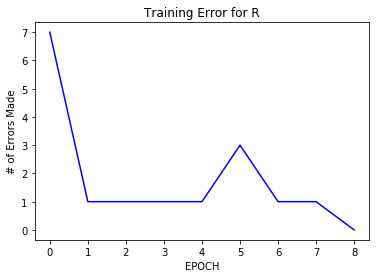

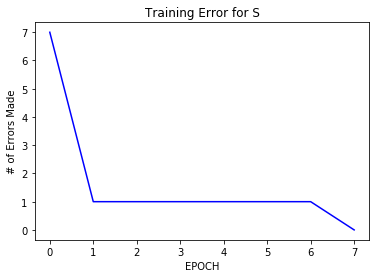

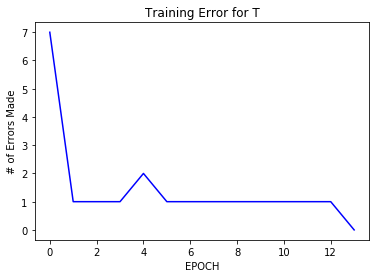

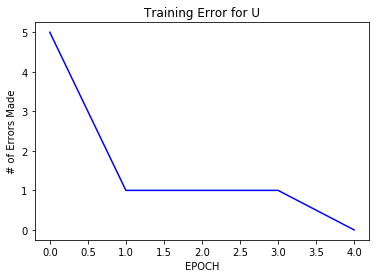

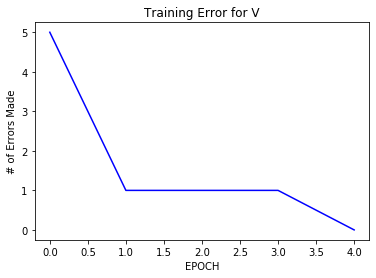

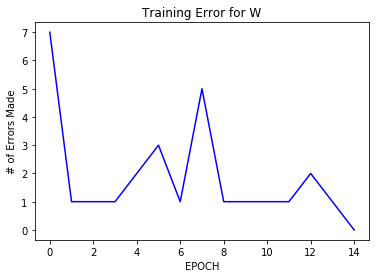

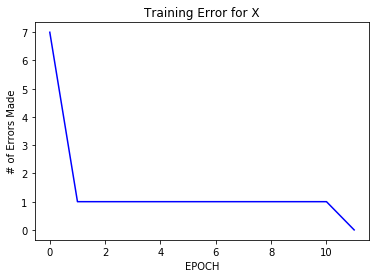

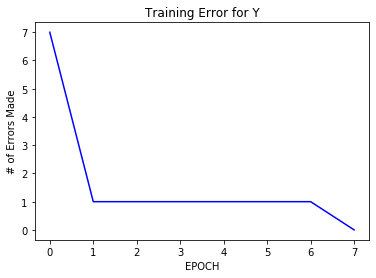

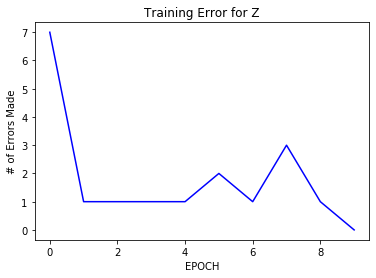

In [72]:
# TRAINING
# Trains all perceptrons and appends them to a list
for i in range(len(TRAINING_SET)):
    TRAIN_SET = np.copy(TRAINING_SET)
    TRAIN_SET[i][-1] = 1
    p = Perceptron(TRAIN_SET, dict_[i])
    p.train(do_print = False) # set do_print to true for errors and accuracy
    p.plot_error()
    perceptrons.append(p)

Some interesting plots:

We found the letter A to be the most consistently predicatable and therefore linearly seperable.

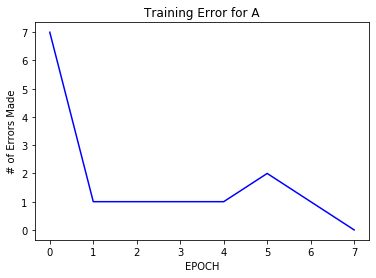

In [73]:
perceptrons[dict['A']].plot_error()

The letter W would converge. However, during testing the perceptron would fire for multiple other letters as well as W

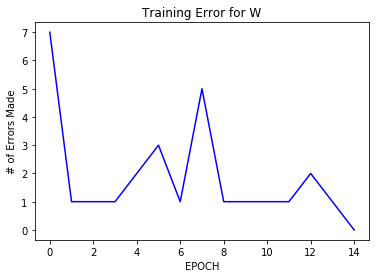

In [74]:
perceptrons[dict['W']].plot_error()

The letter E was found to be not linearly seperable. The plot of errors was never a smooth curve and the perceptron almost never predicted correctly.

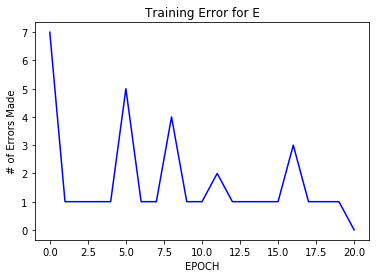

In [75]:
perceptrons[dict['E']].plot_error()

### Testing Loop:

Nested for loop to test each perceptron against each character in the test set. Prints out a message for what Perceptron it is currently testing, if the neuron activates, and for which character it activated for.

In [76]:
# TESTING
# Tests every perceptron against every test character
# Prints message if the perceptron fires
for i in range(len(perceptrons)):
    print("\nTesting perceptron: %s" % perceptrons[i].name)

    for j in range(len(TEST_SET)):
        prediction = perceptrons[i].test(TEST_SET[j])
        if prediction == 1:
            print("Activation: ", dict_[j])


Testing perceptron: A
Activation:  A

Testing perceptron: B
Activation:  B
Activation:  D
Activation:  J

Testing perceptron: C
Activation:  C

Testing perceptron: D

Testing perceptron: E

Testing perceptron: F
Activation:  F

Testing perceptron: G

Testing perceptron: H
Activation:  H

Testing perceptron: I
Activation:  I

Testing perceptron: J

Testing perceptron: K
Activation:  K

Testing perceptron: L
Activation:  L

Testing perceptron: M
Activation:  A
Activation:  J

Testing perceptron: N
Activation:  A
Activation:  J

Testing perceptron: O
Activation:  J
Activation:  O

Testing perceptron: P
Activation:  P

Testing perceptron: Q
Activation:  J

Testing perceptron: R

Testing perceptron: S
Activation:  J

Testing perceptron: T
Activation:  T

Testing perceptron: U
Activation:  J
Activation:  U

Testing perceptron: V
Activation:  V

Testing perceptron: W
Activation:  A
Activation:  W
Activation:  X

Testing perceptron: X
Activation:  X

Testing perceptron: Y
Activation:  Y

Test

## Conclusion

We have found the following characters to be consistently linearly seperable: 

A, C, F, H, I, K, L, P, T, V, X, Y

The following predict correctly, but other neurons also fire on the same perceptron:

B, O, U, W, Z

And the following we found to be non linearly seperable:

D, E, G, J, M, N, Q, R, S